# Yelp Data Challenge - Exploration Data Analysis
Summary: 
- I find the top 50 resturants with most reviews in Las Vegas in 2017.
- I show there is a weak relationship between number of reviews and the quality of retaurants.
- I analyze the top 20 polular restuarant styles in Las Vegas in 2017. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('/Users/LiangTan/Documents/BitTigerDS/Yelp/Yelp_Data_Challenge_Project/dataset/last_year_restaurant_reviews.csv')
df.head(5)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
6,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g
9,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,1,2017-05-28,0,LEzphAnz0vKE32PUCbjLgQ,4,One of the top steak places I've had in Vegas ...,2,3RTesI_MAwct13LWm4rhLw
11,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2017-08-25,0,4e-cxYVdlIu2ZDxVJqUfOQ,5,This place is superb from the customer service...,0,EAOt1UQhJD0GG3l_jv7rWA
19,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,1,2017-02-12,1,heZd0W3HuPJxZBrCYD3wDw,2,"Lousy steak. \n\nThe service was great - Todd,...",3,OtKA03ALQQ1CBhtaJod_Jw
43,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2017-12-10,0,exzXjy7Y2ICX_BEVTDWpJA,5,I got the filet mignon with seared foigras and...,0,Ymtd4cQypep_QZJ-qJsHuA


#### 1. What are the top 50 resturants with most reviews in Las Vegas in 2017 ?

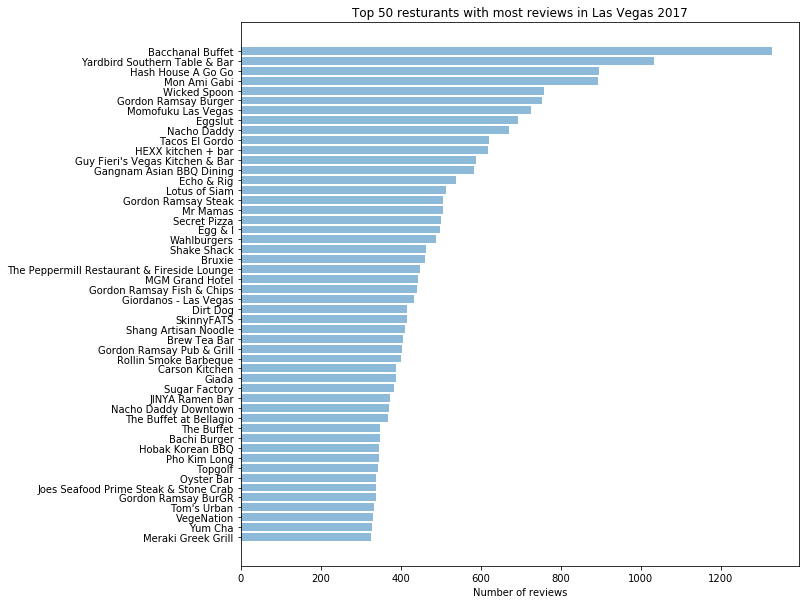

In [3]:
business_id = list(df.groupby(['business_id'])['review_id'].count().index)
resturant_name = [pd.unique(df[df['business_id'] == res]['name'])[0] for res in business_id]
popularity = list(df.groupby(['business_id'])['review_id'].count())
plt.figure(figsize=(10,10))
objects = [resturant_name[i] for i in np.argsort(popularity)[::-1][:50]]
y_pos = np.arange(len(objects))
plt.barh(y_pos, np.sort(popularity)[::-1][:50], align='center', alpha = 0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of reviews')
plt.title('Top 50 resturants with most reviews in Las Vegas 2017')
plt.gca().invert_yaxis()

The more reviews resturants have the more popular resturants are. Does that mean the better the resturant is? To find it out, I will get average starts for the top 50 resturants.

#### 2. The more reviews the better the quality ?
I will check the top 50 resturants with most reviews first. Next I will find the relationship between number of reviews and average rating.

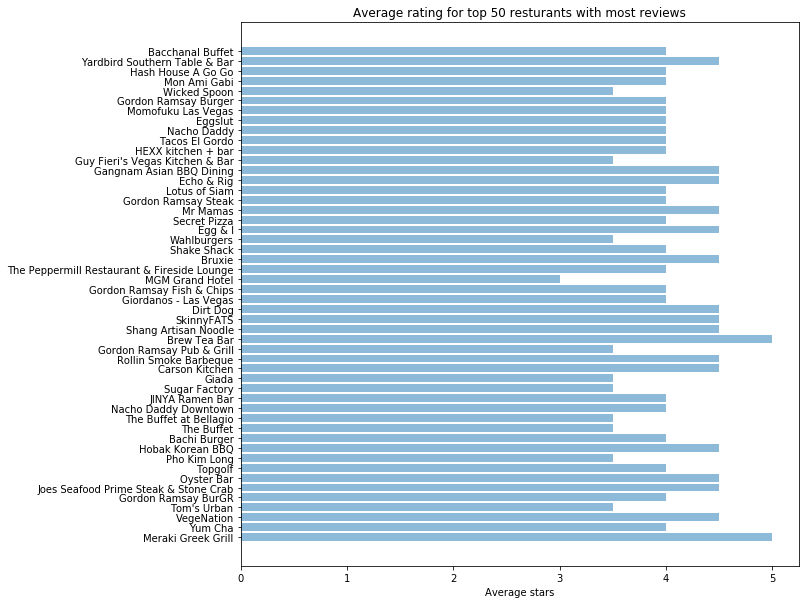

In [4]:
avg_starts = df.groupby(['business_id'])['avg_stars'].mean()
plt.figure(figsize=(10,10))
objects = [resturant_name[i] for i in np.argsort(popularity)[::-1][:50]]
y_pos = np.arange(len(objects))
plt.barh(y_pos, [avg_starts[i] for i in np.argsort(popularity)[::-1][:50]], align='center', alpha = 0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Average stars')
plt.title('Average rating for top 50 resturants with most reviews')
plt.gca().invert_yaxis()

In [5]:
print('The average rate for all resturants in Las Vegas is %f.' \
     %(np.mean(avg_starts)))
print('The proportion of top 50 resturants with rate less than 4 is %f.' \
     %(sum(np.array([avg_starts[i] for i in np.argsort(popularity)[::-1][:50]]) < 4.0)/50.0))
print('The proportion of top 50 resturants with rate less than 3.5 is %f.' \
     %(sum(np.array([avg_starts[i] for i in np.argsort(popularity)[::-1][:50]]) < 3.5)/50.0))


The average rate for all resturants in Las Vegas is 3.478635.
The proportion of top 50 resturants with rate less than 4 is 0.220000.
The proportion of top 50 resturants with rate less than 3.5 is 0.020000.


The top 50 resturants with most reviews show above average quality. However, I can't conclude that the more reviews the better the resturant is. For example, Meraki Greek Grill has average rating as 5 but its reviews number is the lowest in the list.    
Let me check how strong these two factors are related.

In [6]:
from scipy.stats.stats import pearsonr 
print('The correlation coefficient between number of reviews and average rating is %f.' \
      % (pearsonr(np.array(popularity), avg_starts)[0]))

The correlation coefficient between number of reviews and average rating is 0.268614.


Therefore, I can conclude there is weak relationship between number of reviews and average ratings. The number of reviews can be used as a measurement of popularity. However, I can't prove it due to the lack of number of client information from restaurant side

#### 3. What is the popular restaurant style in Las Vegas in 2017?
Here I propose to use number of reviews as replacement for popularity measurement.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = df['categories']
X = vectorizer.fit_transform(corpus) 
X = np.sum(X, axis=0)
X = np.array(X)[0]
cate_label = vectorizer.get_feature_names()

In [8]:
top_20_label = [cate_label[i] for i in np.argsort(X)[::-1][1:21]]
top_20_percentage = [X[i]/sum(X) for i in np.argsort(X)[::-1][1:21]]
print('%25s %25s' % ('Label name', 'Percentage of all labels'))
for i in range(20):
    print('%24s  %24f' % \
          (top_20_label[i], top_20_percentage[i]))

               Label name  Percentage of all labels
                    bars                  0.070593
                    food                  0.058153
                american                  0.056518
               nightlife                  0.034697
                     new                  0.028739
             traditional                  0.026945
               breakfast                  0.026580
                  brunch                  0.026502
                 mexican                  0.016701
              sandwiches                  0.015382
                 seafood                  0.015321
                japanese                  0.014873
                 burgers                  0.014107
                   pizza                  0.012546
                 italian                  0.012320
             steakhouses                  0.011814
                   asian                  0.011560
                   sushi                  0.011512
                  fusion      

From results, I think conclusion is pretty straightforward. The nightlife style restaurants are very popular in Las Vegas.